<a href="https://colab.research.google.com/github/davisallan/enel645Team25Assignment3/blob/dev%2Funet/assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 03 - Auto-encoders and The U-net Model

This assignment is composed of two tasks:

1. Design an auto-encoder to denoise a simple image dataset composed of circles;

2. Implement the U-net model for signal denoising;

Each task corresponds to 50% of the final grade of the assignment. Teams with less than 4 people can choose to do just one of the tasks without any penalty. The deliverables for the assignment are:

1. This jupyter-notebook completed with your solution. 
    - Name the notebook as enel645_assignment03_team_(team number).ipynb
2. The weights of your Auto-encoder and U-net models. 
    - Name the weights files as team_(team number)_autoencoder.h5 (task 01) and team_(team number)_unet.h5 (task 02)

Submit the three files (notebook + models' weights) to your dropbox in the course D2L page (two files if your team has less than 4 people)

You are free to add extra cells of text and code to this notebook.

At the end of the notebook, please include a short description of what each team member did in the assignment. Also include the consensus score between 0 and 3 to each team member. This score will be used to adjust the final 
grade of each student. Students developing the project individually do not need this description and score.

You are being assessed based on:

1. Code execution - 20% 
2. Clarity of the code and your model explanation (e.g., easy to follow, has pertinent comments, etc.) - 20%
3. Proper usage of the techniques seen in class - 30% 
4. Accuracy of the models  - 30%

The data for this assignment can be downloaded here:
- [GDrive](https://drive.google.com/file/d/17XmiQ1lNOP28blGmTFv8Zf5cf08unGgV/view?usp=sharing)
- [OneDrive](https://uofc-my.sharepoint.com/:u:/g/personal/roberto_medeirosdeso_ucalgary_ca/EVe0Mh19GUBGp7qXOIaXRtIBYeJgBtBvc5ULFoT1svhudw?e=rVNREx) - Link expires March 8th, 2021. 

## 1. Denoising Auto-encoder

Develop an auto-encoders that receives as input a 96 x 96 noisy image with a circle of a radius R and outputs the corresponding denoised image. Make the dimensionality of your latent space as low as posisble without compromising the results of the denoised images.

- Justify the choice of your latent space dimension;
- The results will be assessed visually;  

# **** NOTE **** After cloning the repo you have to manually upload the 144mb train.npy to `"Data/Assignment03/AUTOENCODER/`

In [1]:
!git clone https://github.com/davisallan/enel645Team25Assignment3.git

Cloning into 'enel645Team25Assignment3'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 61 (delta 21), reused 11 (delta 0), pack-reused 0
Unpacking objects: 100% (61/61), done.


In [2]:
# Import additional libraries if you need
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf

### 1.1 Load data 

In [ ]:
# Adapt the paths to your environment
X_train = np.load("/content/enel645Team25Assignment3/Data/Assignment03/AUTOENCODER/train.npy")[:,:,:,np.newaxis]
X_val = np.load("/content/enel645Team25Assignment3/Data/Assignment03/AUTOENCODER/train.npy")[:,:,:,np.newaxis]
X_test = np.load("/content/enel645Team25Assignment3/Data/Assignment03/AUTOENCODER/val.npy")
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2000, 96, 96, 1)
(2000, 96, 96, 1)
(500, 96, 96)


### 1.2. Explore your data 

In [ ]:
# Use this space to explore you datasets
# Create additional cells as you see fit

### 1.3. Data scaling and Data augmentation

In [ ]:
# Experiment with different data scaling methods

# Use data augmentation if you think it makes sense...

### 1.4. Define your  model, cost function, optimizer, learning rate

In [ ]:
# Define your model here. 
def my_autoencoder():
    
    return encoder,decoder,autoencoder

### 1.5. Define your callbacks (save your model, patience, etc.)

In [ ]:
model_name_autoencoder = "team_(team number)_autoencoder.h5"

# define your callbacks
# remember that you need to save the weights of your best model!

### 1.6. Train your model

In [ ]:
# train your model - decide for how many epochs

### 1.7. Test your model

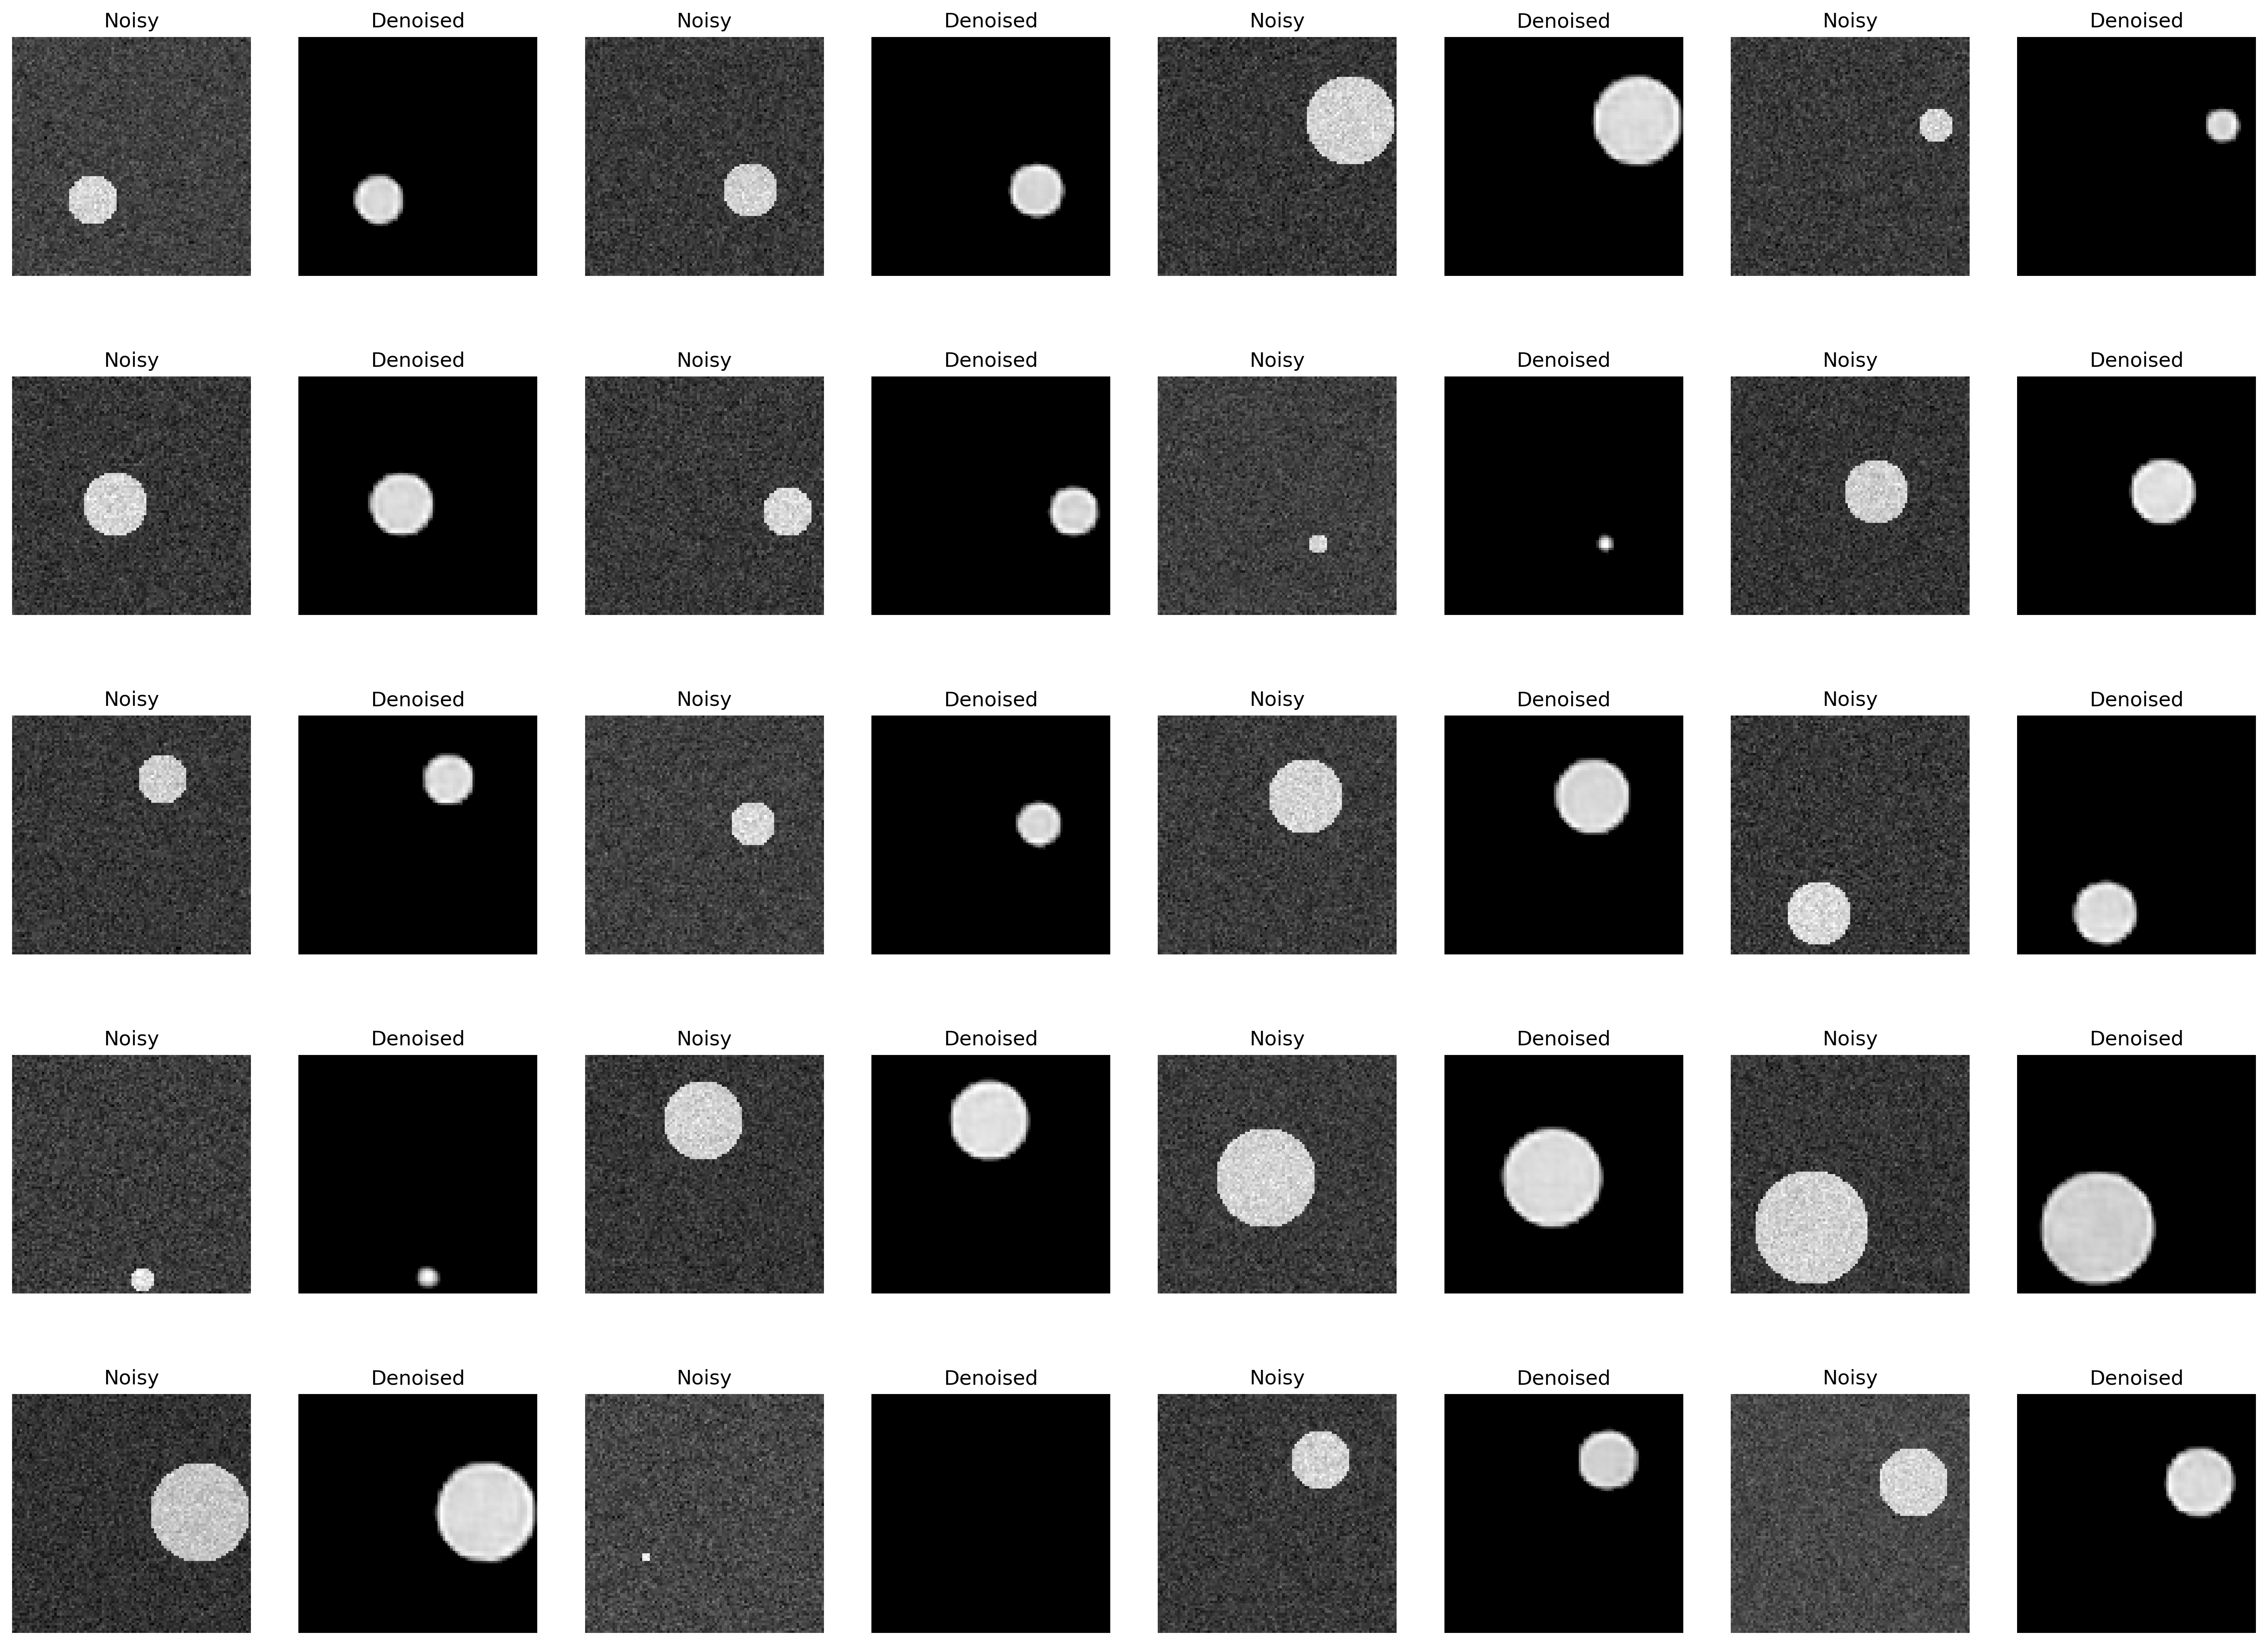

In [ ]:
model.load_weights(model_name_autoencoder)
Xpred = autoencoder.predict(X_test)[:,:,:,0]

# Remember to "unscale your data".


#Showing results
plt.figure(figsize = (24,18), dpi = 300)
for (ii) in range(20):
    plt.subplot(5,8,ii*2+1)
    plt.imshow(X_test[ii], cmap = "gray")
    plt.axis("off")
    plt.title("Noisy")
    plt.subplot(5,8,ii*2 + 2)
    plt.imshow(Xpred[ii], cmap = "gray")
    plt.axis("off")
    plt.title("Denoised")
plt.show()

## 2. Denoising U-net

Develop an U-net model that receives as input 20 1-dimensional noisy measurements of the same signal and outputs the denoised signal.

The mean squared error (MSE) of your U-net model should be lower than the MSE of just averaging the noisy measurements. 

- The results will be assessed using mean squared error. 

### 2.1 Load data  and split into train, validation, test

In [130]:
data = np.load("/content/enel645Team25Assignment3/Data/Assignment03/UNET/noisy_transients.npy")
target = np.load("/content/enel645Team25Assignment3/Data/Assignment03/UNET/reference.npy")
indexes = np.arange(data.shape[0], dtype = int)
np.random.shuffle(indexes)
data = data[indexes]
target = target[indexes]
X_train2 = data[:int(data.shape[0]*0.8)]
Y_train2 = target[:int(data.shape[0]*0.8)]

X_val2 = data[int(data.shape[0]*0.8):int(data.shape[0]*0.9)]
Y_val2 = target[int(data.shape[0]*0.8):int(data.shape[0]*0.9)]

X_test2 = data[int(data.shape[0]*0.9):]
Y_test2 = target[int(data.shape[0]*0.9):]

print(X_train2.shape)
print(Y_train2.shape)
print(X_val2.shape)
print(Y_val2.shape)
print(X_test2.shape)
print(Y_test2.shape)

(216, 256, 20)
(216, 256)
(27, 256, 20)
(27, 256)
(27, 256, 20)
(27, 256)


### 2.2. Explore your data

In [ ]:
# Use this space to explore you datasets
# Create additional cells as you see fit

In [131]:
# define a plotting function to visualize signals pairs from each set
def plot_signal_pairs(X_data_set, Y_data_set):
  sample_indexes = np.random.choice(np.arange(X_data_set.shape[0], dtype=int), size = 9, replace=False)
  plt.figure(figsize=(18,10))
  for (i,j) in enumerate(sample_indexes):
    plt.subplot(3,3,i+1)
    plt.plot(X_data_set[j,:,0], label="Noisy")
    plt.plot(Y_data_set[j], label="Target")
    plt.legend()
  plt.show()

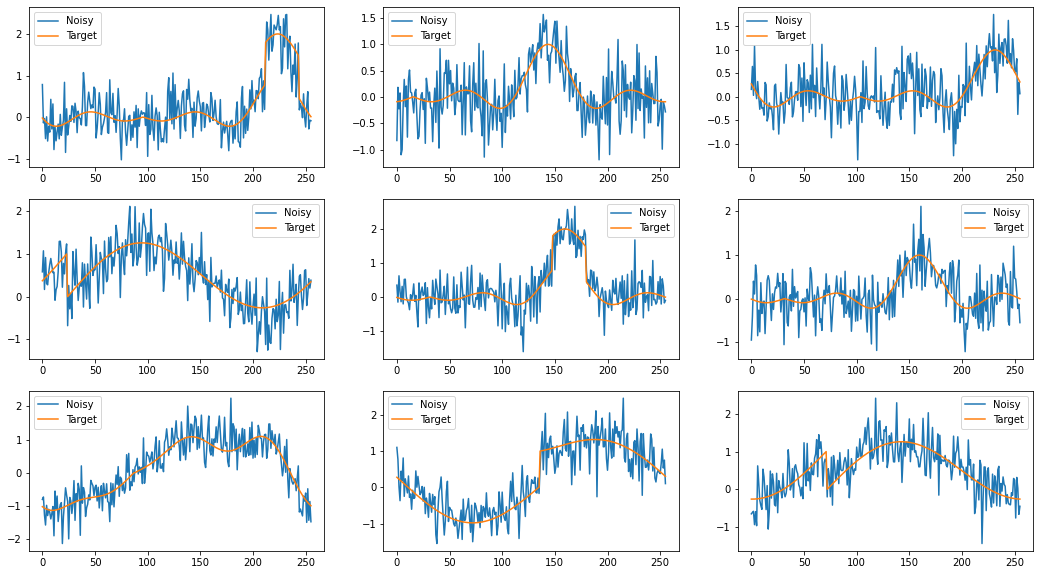

In [132]:
# plot 9 random sets of noisy, clean signals from the training set
plot_signal_pairs(X_train2,Y_train2)

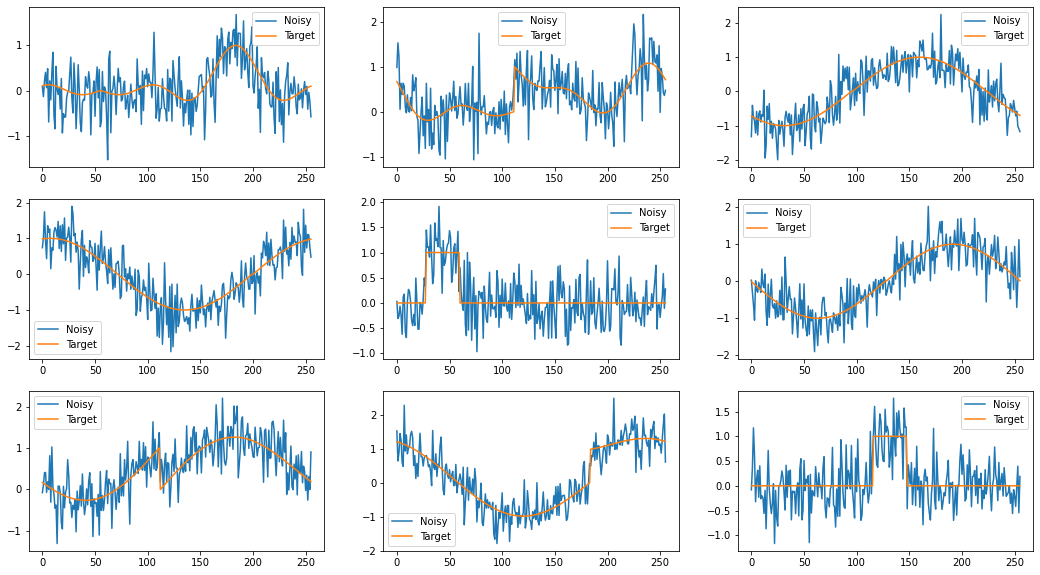

In [133]:
# plot 9 random sets of noisy, clean signals from the validation set
plot_signal_pairs(X_val2,Y_val2)

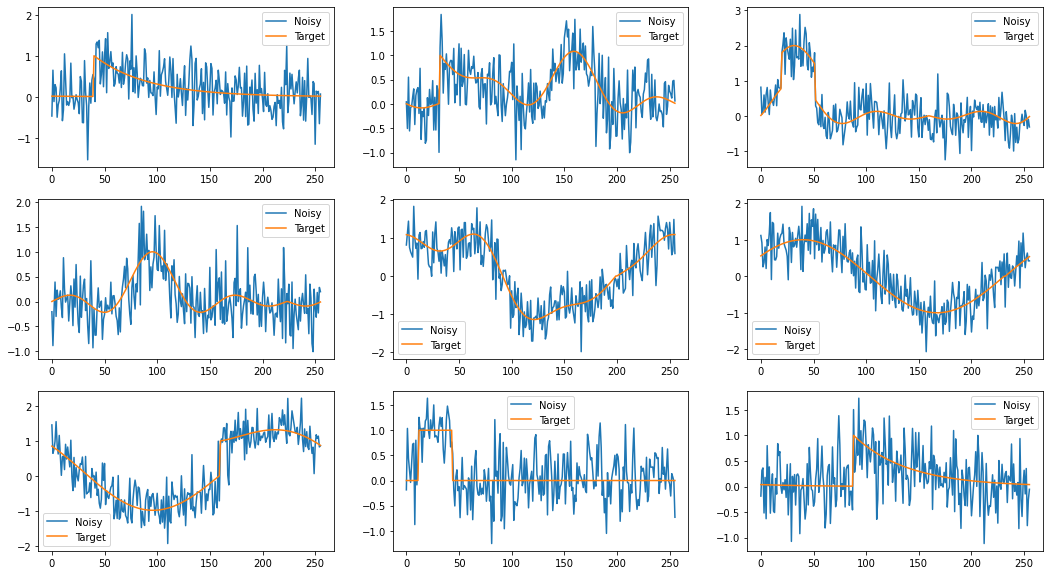

In [134]:
# plot 9 random sets of noisy, clean signals from the test set
plot_signal_pairs(X_test2,Y_test2)

In [135]:
# Get some descriptive statistics of of training and validation sets before any scaling/standardization

print("Descriptive statistics for training feature matrix and target vector before scaling/standardization")
print(X_train2.min(), X_train2.max(), X_train2.mean(), X_train2.std())
print(Y_train2.min(), Y_train2.max(), Y_train2.mean(), Y_train2.std(), "\n")

print("Descriptive statistics for validation feature matrix and target vector before scaling/standardization")
print(X_val2.min(), X_val2.max(), X_val2.mean(), X_val2.std())
print(Y_val2.min(), Y_val2.max(), Y_val2.mean(), Y_val2.std(), "\n")

print("Descriptive statistics for test feature matrix and target vector before scaling/standardization")
print(X_test2.min(), X_test2.max(), X_test2.mean(), X_test2.std())
print(Y_test2.min(), Y_test2.max(), Y_test2.mean(), Y_test2.std())

Descriptive statistics for training feature matrix and target vector before scaling/standardization
-2.9169581831740183 3.7456143553633217 0.20675027290557937 0.7146126209056479
-1.1411321715982128 1.9995952979705165 0.20637005028483021 0.5723519806819951 

Descriptive statistics for validation feature matrix and target vector before scaling/standardization
-2.7558362907935336 2.8988043365194023 0.1748859928420332 0.7950545318034111
-1.1411321715982128 1.3191175931546932 0.1745739454771208 0.6686924490781937 

Descriptive statistics for test feature matrix and target vector before scaling/standardization
-2.5905966424025637 3.4844627790345424 0.19970690304161168 0.7475096681656709
-1.1411321715982128 1.9995952979705165 0.19966775868138953 0.6131197958144092


### 2.3. Data scaling and Data augmentation

In [136]:
# Experiment with different data scaling methods

# I don't think augmentation is going to make sense for signal denoising. 
# Scaling should really be the only preprocessing that needs to be applied to signals.

In [137]:
# Implement different types of data scaling

norm_type = 1 # 0 for min-max scaling, 1 for standardization, any other integer for using the data as-is

# case for data normalization
if norm_type == 0: # relu activation will be able to be used here, however this doesn't yield a good signal pair plot
  # scale the feature matrices
  X_train2_min, X_train2_max = X_train2.min(), X_train2.max()
  X_train2_scaled = (X_train2 - X_train2_min)/(X_train2_max - X_train2_min)
  X_val2_scaled = (X_val2 - X_train2_min)/(X_train2_max - X_train2_min)
  X_test2_scaled = (X_test2 - X_train2_min)/(X_train2_max - X_train2_min)

  # scale the target vectors
  Y_train2_min, Y_train2_max = Y_train2.min(), Y_train2.max()
  Y_train2_scaled = (Y_train2 - Y_train2_min)/(Y_train2_max - Y_train2_min)
  Y_val2_scaled = (Y_val2 - Y_train2_min)/(Y_train2_max - Y_train2_min)
  Y_test2_scaled = (Y_test2 - Y_train2_min)/(Y_train2_max - Y_train2_min)

# case for data standardization
elif norm_type == 1: # relu activation won't be able to be used here, maybe try TanH?
  # scale the feature matrices.
  X_train2_mean, X_train2_std = X_train2.mean(), X_train2.std()
  X_train2_scaled = (X_train2 - X_train2_mean)/X_train2_std
  X_val2_scaled = (X_val2 - X_train2_mean)/X_train2_std
  X_test2_scaled = (X_test2 - X_train2_mean)/X_train2_std

  # scale the target vectors
  Y_train2_mean, Y_train2_std = Y_train2.mean(), Y_train2.std()
  Y_train2_scaled = (Y_train2 - Y_train2_mean)/Y_train2_std
  Y_val2_scaled = (Y_val2 - Y_train2_mean)/Y_train2_std
  Y_test2_scaled = (Y_test2 - Y_train2_mean)/Y_train2_std
  
# case for using the data as-is, no normalization or standardization
else:
  pass

In [138]:
# Get some descriptive statistics of of training, validation, and test sets after any scaling/standardization

print("Descriptive statistics for training feature matrix and target vector after scaling/standardization")
print(X_train2_scaled.min(), X_train2_scaled.max(), X_train2_scaled.mean(), X_train2_scaled.std())
print(Y_train2_scaled.min(), Y_train2_scaled.max(), Y_train2_scaled.mean(), Y_train2_scaled.std(), "\n")

print("Descriptive statistics for validation feature matrix and target vector after scaling/standardization")
print(X_val2_scaled.min(), X_val2_scaled.max(), X_val2_scaled.mean(), X_val2_scaled.std())
print(Y_val2_scaled.min(), Y_val2_scaled.max(), Y_val2_scaled.mean(), Y_val2_scaled.std(), "\n")

print("Descriptive statistics for test feature matrix and target vector after scaling/standardization")
print(X_test2_scaled.min(), X_test2_scaled.max(), X_test2_scaled.mean(), X_test2_scaled.std())
print(Y_test2_scaled.min(), Y_test2_scaled.max(), Y_test2_scaled.mean(), Y_test2_scaled.std())

Descriptive statistics for training feature matrix and target vector after scaling/standardization
-4.3711912785990785 4.95214327165513 -1.177042002959078e-17 0.9999999999999998
-2.354324379689235 3.133081230100646 -1.2335811384723961e-17 0.9999999999999999 

Descriptive statistics for validation feature matrix and target vector after scaling/standardization
-4.145723818793666 3.7671515795538424 -0.04458958480633001 1.1125671567286581
-2.354324379689235 1.9441664926955453 -0.055553410979415616 1.168323814100202 

Descriptive statistics for test feature matrix and target vector after scaling/standardization
-3.9144941377651428 4.5866983177193665 -0.009856206926546292 1.046034797451984
-2.354324379689235 3.133081230100646 -0.01171008720098153 1.0712285735149139


In [139]:
# define a plotting function to visualize signals pairs from each set
def plot_signal_pairs_2D(X_data_set, Y_data_set):
  sample_indexes = np.random.choice(np.arange(X_data_set.shape[0], dtype=int), size = 9, replace=False)
  plt.figure(figsize=(18,10))
  for (i,j) in enumerate(sample_indexes):
    plt.subplot(3,3,i+1)
    plt.plot(X_data_set[j,:,0], label="Noisy")
    plt.plot(Y_data_set[j], label="Target")
    plt.legend()
  plt.show()

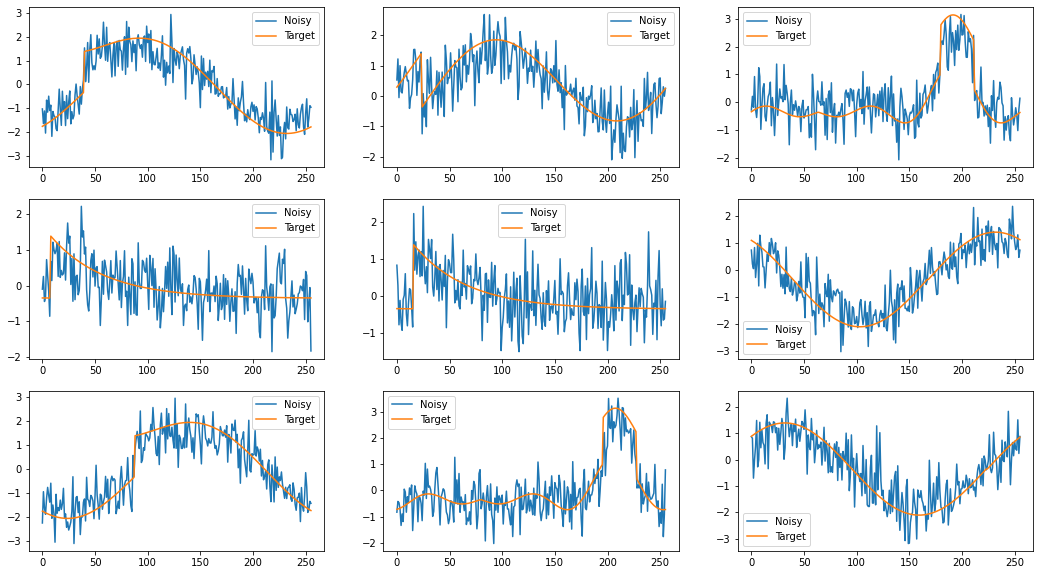

In [140]:
# Show what some signal pairs look like after scaling/standardization in the training set
plot_signal_pairs_2D(X_train2_scaled,Y_train2_scaled)

In [141]:
X_train2_scaled_avg = np.mean(X_train2_scaled, axis = -1)
X_val2_scaled_avg = np.mean(X_val2_scaled, axis = -1)
X_test2_scaled_avg = np.mean(X_test2_scaled, axis = -1)

### 2.4. Define your  model, cost function, optimizer, learning rate

In [142]:
# Define your model here. 
def my_unet(lr = 1e-3, learning_decay = 1e-6, drop_out = 0.1, kshape = 3):

  input_shape = (256, 1)
  dropout = drop_out
  pool_size = 2
  size = 2

  input = tf.keras.layers.Input(input_shape)

  conv1 = tf.keras.layers.Conv1D(48, kshape, activation='relu', padding='same')(input)
  conv1 = tf.keras.layers.Conv1D(48, kshape, activation='relu', padding='same')(conv1)
  pool1 = tf.keras.layers.MaxPooling1D(pool_size=pool_size)(conv1)

  conv2 = tf.keras.layers.Conv1D(96, kshape, activation='relu', padding='same')(pool1)
  conv2 = tf.keras.layers.Conv1D(96, kshape, activation='relu', padding='same')(conv2)
  pool2 = tf.keras.layers.MaxPooling1D(pool_size=pool_size)(conv2)

  conv3 = tf.keras.layers.Conv1D(192, kshape, activation='relu', padding='same')(pool2)
  conv3 = tf.keras.layers.Conv1D(192, kshape, activation='relu', padding='same')(conv3)
  pool3 = tf.keras.layers.MaxPooling1D(pool_size=pool_size)(conv3)

  conv4 = tf.keras.layers.Conv1D(384, kshape, activation='relu', padding='same')(pool3)
  conv4 = tf.keras.layers.Conv1D(384, kshape, activation='relu', padding='same')(conv4)
  pool4 = tf.keras.layers.MaxPooling1D(pool_size=pool_size)(conv4)
  pool4 = tf.keras.layers.Dropout(dropout)(pool4)

  conv5 = tf.keras.layers.Conv1D(768, kshape, activation='relu', padding='same')(pool4)
  conv5 = tf.keras.layers.Conv1D(768, kshape, activation='relu', padding='same')(conv5)

  up6 = tf.keras.layers.concatenate([tf.keras.layers.UpSampling1D(size=size)(conv5), conv4], axis=-1)
  up6 = tf.keras.layers.Dropout(dropout)(up6)
  conv6 = tf.keras.layers.Conv1D(384, kshape, activation='relu', padding='same')(up6)
  conv6 = tf.keras.layers.Conv1D(384, kshape, activation='relu', padding='same')(conv6)

  up7 = tf.keras.layers.concatenate([tf.keras.layers.UpSampling1D(size=size)(conv6), conv3], axis=-1)
  up7 = tf.keras.layers.Dropout(dropout)(up7)
  conv7 = tf.keras.layers.Conv1D(192, kshape, activation='relu', padding='same')(up7)
  conv7 = tf.keras.layers.Conv1D(192, kshape, activation='relu', padding='same')(conv7)

  up8 = tf.keras.layers.concatenate([tf.keras.layers.UpSampling1D(size=size)(conv7), conv2], axis=-1)
  up8 = tf.keras.layers.Dropout(dropout)(up8)
  conv8 = tf.keras.layers.Conv1D(96, kshape, activation='relu', padding='same')(up8)
  conv8 = tf.keras.layers.Conv1D(96, kshape, activation='relu', padding='same')(conv8)

  up9 = tf.keras.layers.concatenate([tf.keras.layers.UpSampling1D(size=size)(conv8), conv1], axis=-1)
  up9 = tf.keras.layers.Dropout(dropout)(up9)
  conv9 = tf.keras.layers.Conv1D(48, kshape, activation='relu', padding='same')(up9)
  conv9 = tf.keras.layers.Conv1D(48, kshape,  activation='relu', padding='same')(conv9)

  conv10 = tf.keras.layers.Conv1D(1, 1, activation='linear')(up9)
  out = tf.keras.layers.Add()([conv10, input])
  model = tf.keras.models.Model(inputs=input, outputs=out)
  opt = tf.keras.optimizers.Adam(learning_rate=lr, decay=learning_decay)
  model.compile(optimizer = opt, loss = 'mse')

  return model

In [143]:
model = my_unet()
print(model.summary())

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 256, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_133 (Conv1D)             (None, 256, 48)      192         input_8[0][0]                    
__________________________________________________________________________________________________
conv1d_134 (Conv1D)             (None, 256, 48)      6960        conv1d_133[0][0]                 
__________________________________________________________________________________________________
max_pooling1d_28 (MaxPooling1D) (None, 128, 48)      0           conv1d_134[0][0]                 
____________________________________________________________________________________________

### 2.5. Define your callbacks (save your model, patience, etc.)

In [144]:
model_name_unet = "team_25_unet.h5"

# define your callbacks
# remember that you need to save the weights of your best model!

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

monitor = tf.keras.callbacks.ModelCheckpoint(model_name_unet, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=True, mode='min')

# Learning rate schedule
def scheduler(epoch, lr):
  if epoch%5 == 0 and epoch != 0:
    lr = lr/2
  return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

### 2.6. Train your model

In [145]:
# train your model - decide for how many epochs

history = model.fit(X_train2_scaled_avg, Y_train2_scaled, 
                    epochs=50, batch_size=32, verbose=1, 
                    callbacks=[early_stop, monitor, lr_schedule], 
                    validation_data=(X_val2_scaled_avg, Y_val2_scaled))

Epoch 1/50
7/7 [==============================] - 11s 1s/step - loss: 0.0452 - val_loss: 0.0210
Epoch 2/50
7/7 [==============================] - 8s 1s/step - loss: 0.0198 - val_loss: 0.0170
Epoch 3/50
7/7 [==============================] - 8s 1s/step - loss: 0.0172 - val_loss: 0.0144
Epoch 4/50
7/7 [==============================] - 8s 1s/step - loss: 0.0144 - val_loss: 0.0115
Epoch 5/50
7/7 [==============================] - 8s 1s/step - loss: 0.0115 - val_loss: 0.0087
Epoch 6/50
7/7 [==============================] - 8s 1s/step - loss: 0.0092 - val_loss: 0.0077
Epoch 7/50
7/7 [==============================] - 8s 1s/step - loss: 0.0084 - val_loss: 0.0069
Epoch 8/50
7/7 [==============================] - 8s 1s/step - loss: 0.0076 - val_loss: 0.0064
Epoch 9/50
7/7 [==============================] - 8s 1s/step - loss: 0.0071 - val_loss: 0.0057
Epoch 10/50
7/7 [==============================] - 8s 1s/step - loss: 0.0066 - val_loss: 0.0054
Epoch 11/50
7/7 [==============================]

### 2.7. Test your model

In [147]:
#saving training history to a numpy file
np.save('Unet_model_history.npy', history.history)

Unet MSE:
0.0009907634953577912
Mean MSE:
0.008884176673904712


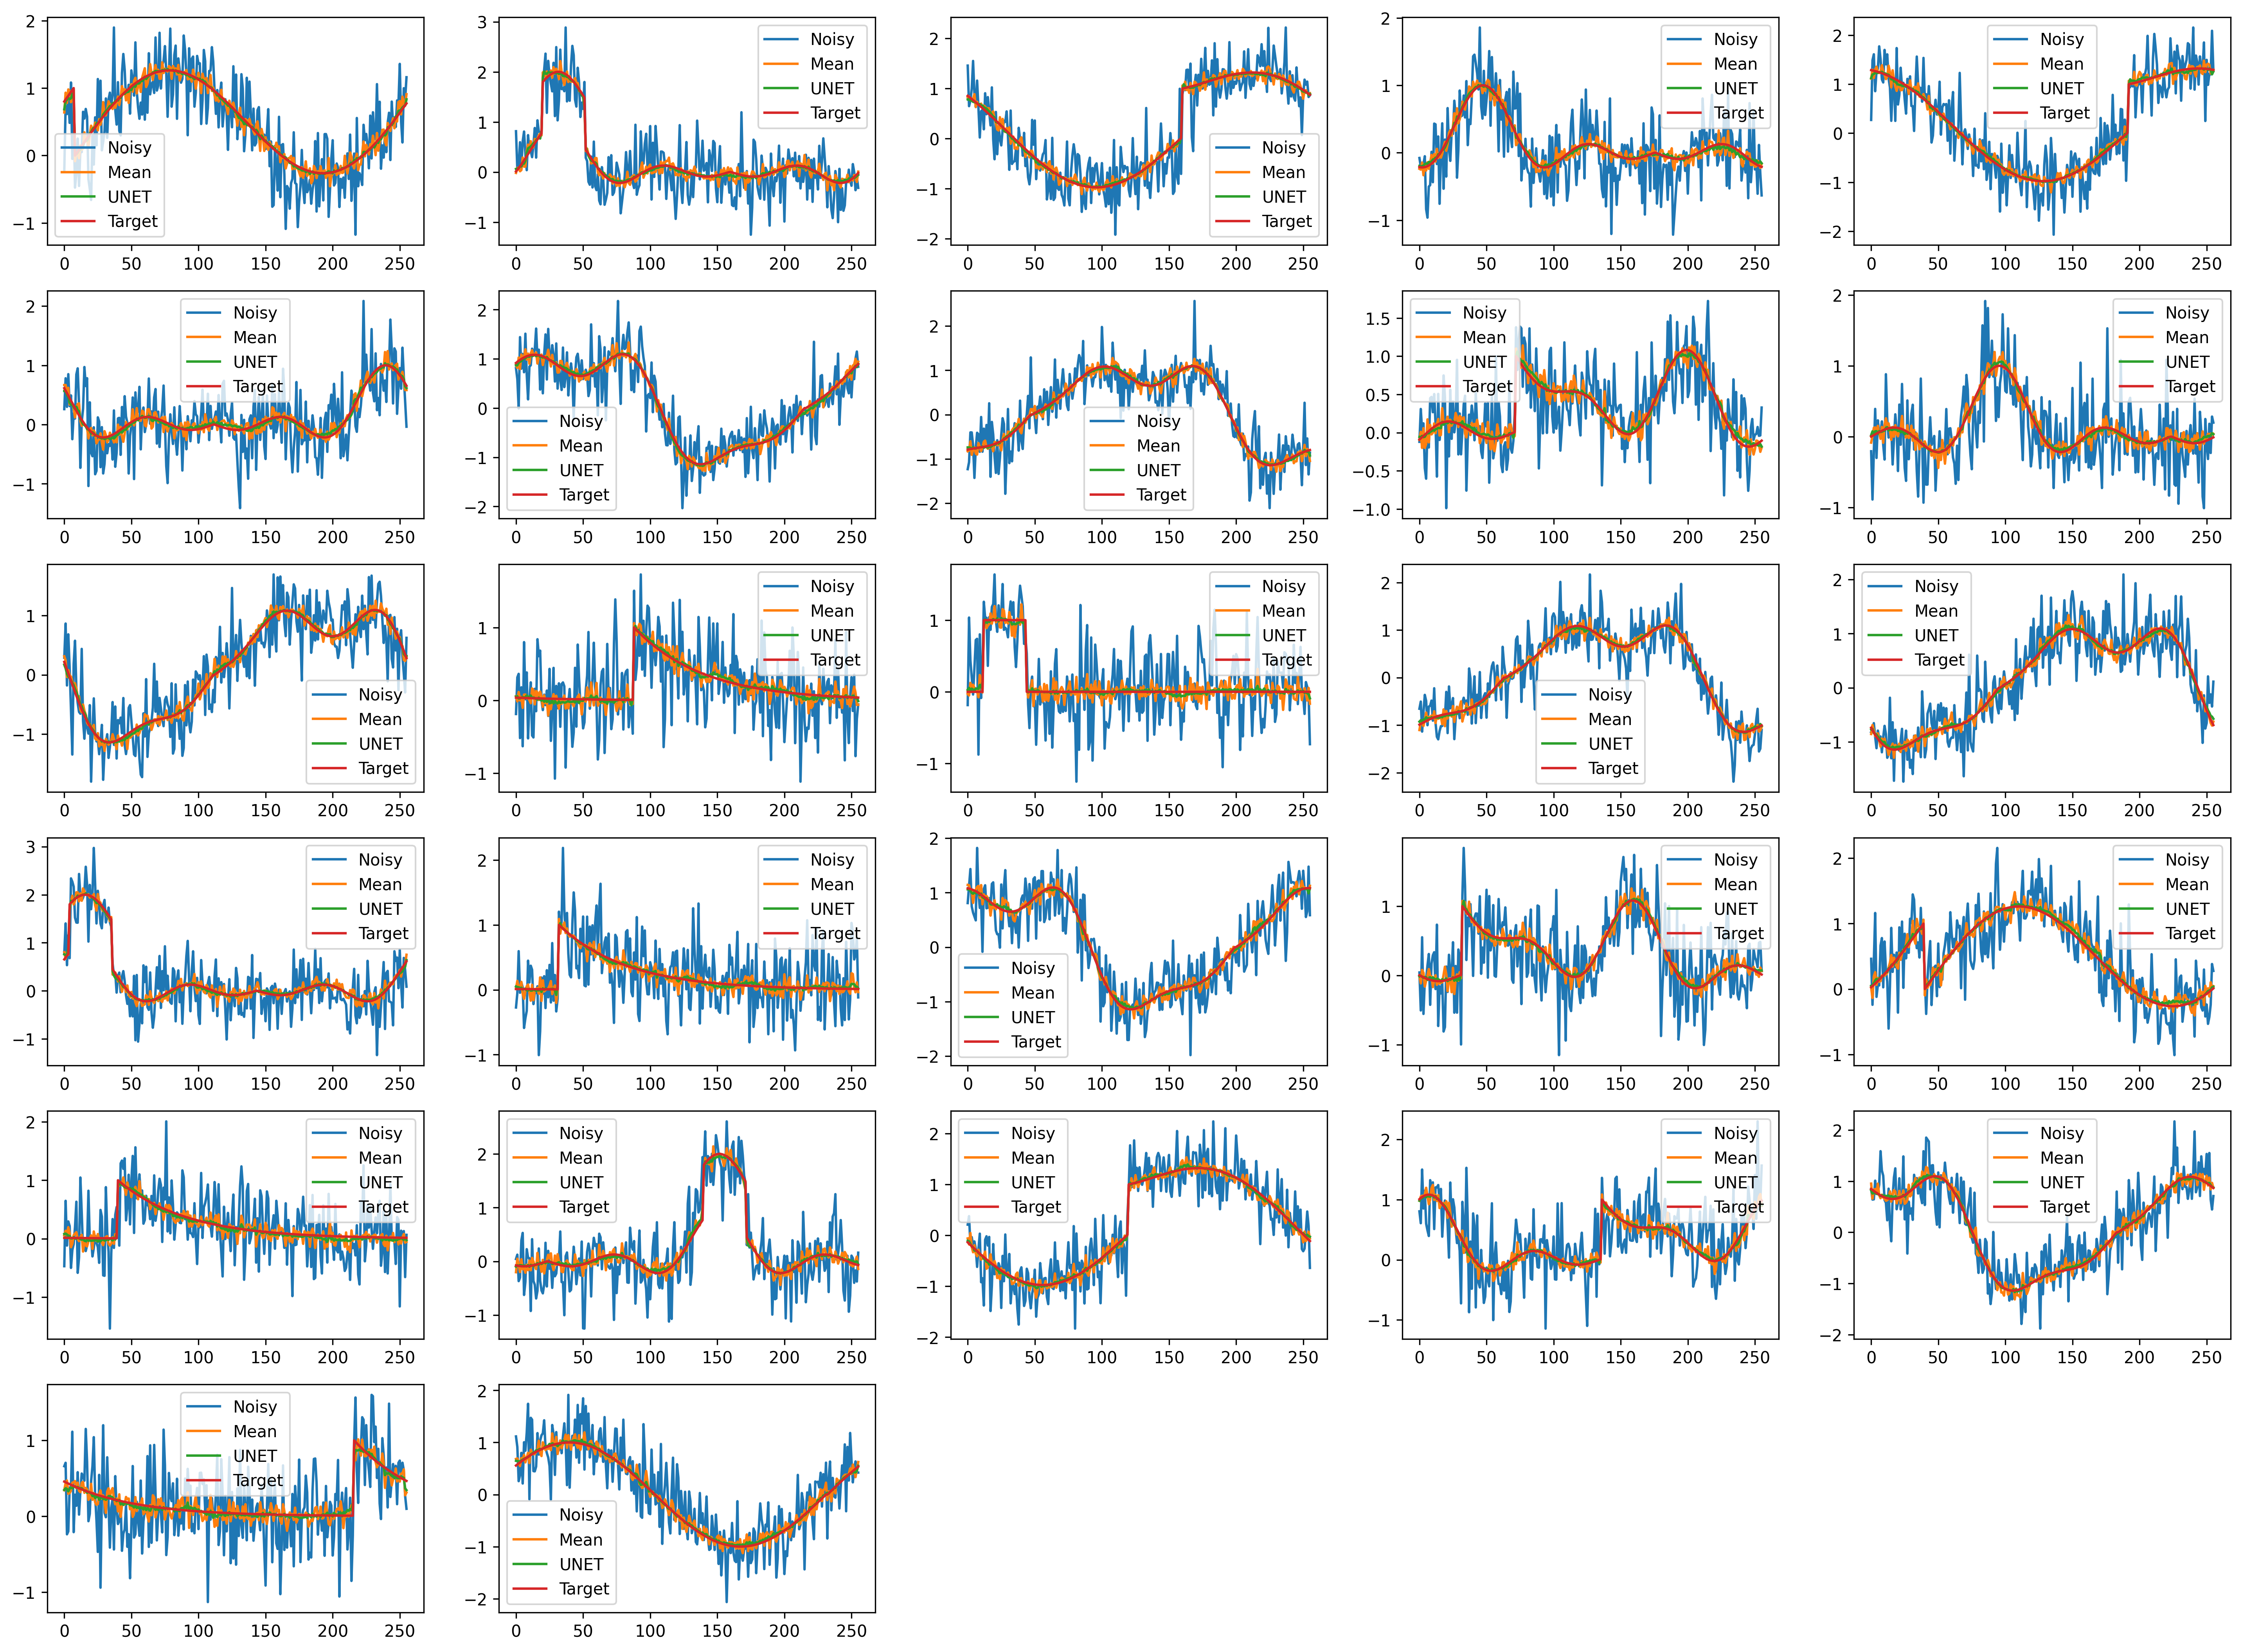

In [154]:
model.load_weights(model_name_unet)

Ypred = model.predict(X_test2_scaled_avg)
Xmean = X_test2.mean(axis = -1)

# Remember to "unscale your data".
if norm_type == 1:
  Ypred_unscaled = (Ypred)*(Y_train2_std) + (Y_train2_mean)

print("Unet MSE:")
print(((Ypred_unscaled - Y_test2[:,:,np.newaxis])**2).mean())
print("Mean MSE:")
print(((Xmean - Y_test2)**2).mean())

#Showing results
plt.figure(figsize = (24,18), dpi = 300)
for (ii) in range(27):
    plt.subplot(6,5,ii+1)
    plt.plot(X_test2[ii,:,0], label = "Noisy")
    plt.plot(Xmean[ii], label = "Mean")
    plt.plot(Ypred_unscaled[ii], label = "UNET")
    plt.plot(Y_test2[ii], label = "Target")
    plt.legend()
plt.show()

##  Team members participtaion

- **Patrick Pickard** Designed the U-net model, callbacks, helped with data scaling and input averaging, trained U-net model, and tested as well. (**score 3**)
- **Joshua Posyluzny** Loaded, explored, augmented, scaled, and previewed all of the input data required for the U-net model. (**score 3**)
- ...